In [1]:
import numpy as np
import torch

In [2]:
torch.__version__

'2.0.0+cu118'

In [4]:
#torch vision itu utk mengubah daataset menjadi tensor, pake transform
#
import torch
import torch.nn as nn
import torch.nn.functional as F          
from torch.utils.data import DataLoader  #load data
from torchvision import datasets, transforms

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [10]:
transform = transforms.ToTensor()

In [12]:
#survise itu ada ann cnn itu MAKE/punya LABEL, contoh lain : random forest, decision tree
#data yg ga pake labeljg bisa pake supervise, tp ga lngsung masukin, make metode lain kyk K-means clustering
#KMeans itu melabelkan data terdekat

train_data = datasets.MNIST(root='/CNN/Data', train=True, download=True, transform=transform)
train_data


100%|██████████| 9912422/9912422 [00:01<00:00, 9819049.47it/s] 


Extracting /CNN/Data\MNIST\raw\train-images-idx3-ubyte.gz to /CNN/Data\MNIST\raw



100%|██████████| 28881/28881 [00:00<?, ?it/s]

Extracting /CNN/Data\MNIST\raw\train-labels-idx1-ubyte.gz to /CNN/Data\MNIST\raw



100%|██████████| 1648877/1648877 [00:00<00:00, 7566422.10it/s]


Extracting /CNN/Data\MNIST\raw\t10k-images-idx3-ubyte.gz to /CNN/Data\MNIST\raw



100%|██████████| 4542/4542 [00:00<00:00, 4193380.75it/s]

Extracting /CNN/Data\MNIST\raw\t10k-labels-idx1-ubyte.gz to /CNN/Data\MNIST\raw



Dataset MNIST
    Number of datapoints: 60000
    Root location: /CNN/Data
    Split: Train
    StandardTransform
Transform: ToTensor()

In [13]:
test_data = datasets.MNIST(root='/CNN/Data', train=False, download=True, transform=transform)
test_data


Dataset MNIST
    Number of datapoints: 10000
    Root location: /CNN/Data
    Split: Test
    StandardTransform
Transform: ToTensor()

In [15]:
#Preview training data
train_data[0]


(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 

Shape: torch.Size([1, 28, 28]) 
Label: 5


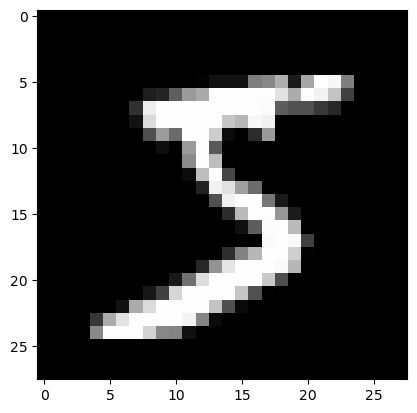

In [25]:
image, label = train_data[0]
print('Shape:', image.shape, '\nLabel:', label)

plt.imshow(train_data[0][0].reshape((28,28)), cmap="gray");


In [18]:
torch.manual_seed(101) #ga harus 101 (yg populer 101, 48, 23,)
#di awal iterasi kan harus masukin nilai weight sm bias
#101 itu random data utk weight yg udah di set valuenya
#kan kalo anu baru tu nilai weightnya ga aifx, ada data baru trs.
#yg paling cepet dan akurasi bagus tu randm weightnya 101

train_loader = DataLoader(train_data, batch_size=100, shuffle=True) 
#partisi train data jd 100 100
#suffle dibuat true agar optimal pencarian weightnya
#datanya tu dishuffle atau diavak lg setiap iterasinya
#biar mudeng liat gambar di https://towardsdatascience.com/cross-validation-c4fae714f1c5

test_loader = DataLoader(test_data, batch_size=500, shuffle=False)


Labels:  [   7    1    6    9    5    0    7    1    1    9    5    7]


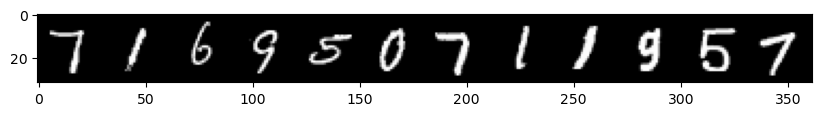

In [22]:
#torch.size([100, 1, 28, 28])
from torchvision.utils import make_grid
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}')) # format to widen the printed array

# Grab the first batch of images
for images,labels in train_loader: 
    break

# Print the first 12 labels from 100 labels (remember we set 1 batch = 100 images)
print('Labels: ', labels[:12].numpy())

# Print the first 12 images
im = make_grid(images[:12], nrow=12)  #yang ditampilkan dibatasi sampe 12 aja
plt.figure(figsize=(10,4))
# We need to transpose the images from CWH (Color, Width, Height) to WHC (Width, Height, Color)
plt.imshow(np.transpose(im.numpy(), (1, 2, 0))); #1,2,0 tu dr torch shape diubah jd 28,28,1


In [26]:
class MultilayerPerceptron(nn.Module):
    def __init__(self, in_sz=784, out_sz=10, layers=[120,84]): #784 dr 28x28
        super().__init__()
        self.fc1 = nn.Linear(in_sz,layers[0]) #input layer, layers[0]==> taken grom layer=120, look the function header
        self.fc2 = nn.Linear(layers[0],layers[1]) #hidden layer 1
        self.fc3 = nn.Linear(layers[1],out_sz) #hidden layer 2 to output
    #itu diatas adl linier combiner, cek di slide hal 30 pkknya yg ppt dsc
    #multiclass sbeaiknya menghindari sigmoid sm linear, jd make relU
    
    def forward(self,X): #forward bias
        X = F.relu(self.fc1(X)) #forward input layer to hidden layer 1
        X = F.relu(self.fc2(X)) #result from previous layer, pass to the hidden layer 1 - 2
        X = self.fc3(X) #forward process from hidden layer 2 to output
        return F.log_softmax(X, dim=1) #dim=dimension

    #fungsi dr fungsi aktivasi adl normalisasi, jdangka yang di ... hrs ada rangenya batas atas batas bawah
    #angka bervariasi dr linear combiner itu dimasukkan ke activ func sbg Z, cek persnya di sigmoid act func di gugel
    
    #proses ke depan namanya forward, itung eror, kalo makin besar erornya, dikembalikan ke awal
    #namanya back propagation
    
    #ngeset value eror terserah kt (?)
    
    #sete;ah output layer ada softmax

In [28]:
torch.manual_seed(101)
model = MultilayerPerceptron()
model
#bias = True meaning that we add bias in each neuron

MultilayerPerceptron(
  (fc1): Linear(in_features=784, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

In [30]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001) #learning rate adalah MIU standarnya 0,001
#ttg optimizer di ppt

In [32]:
# Load the first batch, print its shape
for images, labels in train_loader:
    print('Batch shape:', images.size())
    break


Batch shape: torch.Size([100, 1, 28, 28])


In [33]:
images.view(100, -1). size() #ini karena misal for 0 to 10, 10 nya tu ga masuk cuma sampe 9 , jd dikasi -1
#-1 , meaning grab all after array 100 until sequence before -1, and combine them into a single dimension

torch.Size([100, 784])

In [34]:
#TRAIN DATA
import time
start_time = time.time()

#bisa percobaan batch(?) sozenya ditambah, ini kan 100

epochs = 10 #try and try
train_losses = []
test_losses = []
train_correct = []
test_correct = []

for i in range(epochs):
    trn_corr = 0 #train correct currently
    tst_corr = 0 #test correst
    
    # Run the training batches
    # with enumerate, we're actually going to keep track of what batch number we're on with B.
    for b, (X_train, y_train) in enumerate(train_loader): #y_train=output = label, b = batches, train_loader = return back the image and its label
        b+=1
        
        # Apply the model
        y_pred = model(X_train.view(100, -1))  # Here we flatten X_train
        loss = criterion(y_pred, y_train) #calculating error difference
 
        # calculate the number of correct predictions
        predicted = torch.max(y_pred.data, 1)[1] #check print(y_pred.data) to know data of one epoch, 1 = actual predicted value
        batch_corr = (predicted == y_train).sum()
        trn_corr += batch_corr
        
        # Update parameters
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Print results per epoch:
        if b%200 == 0:
            print(f'epoch: {i:2}  batch: {b:4} [{100*b:6}/60000]  loss: {loss.item():10.8f}  \
accuracy: {trn_corr.item()*100/(100*b):7.3f}%')
    
    # Update train loss & accuracy for the epoch
    train_losses.append(loss.item())
    train_correct.append(trn_corr.item())
        
    # Run the testing batches
    with torch.no_grad(): #don't update weight and bias in test data
        for b, (X_test, y_test) in enumerate(test_loader): #enumerate itu indexing

            # Apply the model
            y_val = model(X_test.view(500, -1))  # Here we flatten X_test, 500 because batch size for test data in cell above = 500

            # Calculating the number of correct predictions
            predicted = torch.max(y_val.data, 1)[1] 
            #kan td setelah dianukan softmax 0 sampe 1, nah itu dicari maxnya
            #jd max itu dicari yg paling mendekati nilai 1
            # , 1 itu actualnya 1 di hot td. misal angkanya itu 5, nah 5 itu 1 yg lain 0 0 0
            tst_corr += (predicted == y_test).sum()
    
    # Update test loss & accuracy for the epoch
    loss = criterion(y_val, y_test)
    test_losses.append(loss)
    test_correct.append(tst_corr)
        
print(f'\nDuration: {time.time() - start_time:.0f} seconds') # print the time elapsed


epoch:  0  batch:  200 [ 20000/60000]  loss: 0.29955012  accuracy:  82.655%
epoch:  0  batch:  400 [ 40000/60000]  loss: 0.27258998  accuracy:  87.248%
epoch:  0  batch:  600 [ 60000/60000]  loss: 0.18161915  accuracy:  89.317%
epoch:  1  batch:  200 [ 20000/60000]  loss: 0.17173445  accuracy:  94.625%
epoch:  1  batch:  400 [ 40000/60000]  loss: 0.05133364  accuracy:  95.005%
epoch:  1  batch:  600 [ 60000/60000]  loss: 0.14173491  accuracy:  95.252%
epoch:  2  batch:  200 [ 20000/60000]  loss: 0.16810292  accuracy:  96.565%
epoch:  2  batch:  400 [ 40000/60000]  loss: 0.17132746  accuracy:  96.530%
epoch:  2  batch:  600 [ 60000/60000]  loss: 0.10914480  accuracy:  96.592%
epoch:  3  batch:  200 [ 20000/60000]  loss: 0.14204615  accuracy:  97.470%
epoch:  3  batch:  400 [ 40000/60000]  loss: 0.01208984  accuracy:  97.487%
epoch:  3  batch:  600 [ 60000/60000]  loss: 0.07614830  accuracy:  97.408%
epoch:  4  batch:  200 [ 20000/60000]  loss: 0.05001246  accuracy:  98.020%
epoch:  4  b

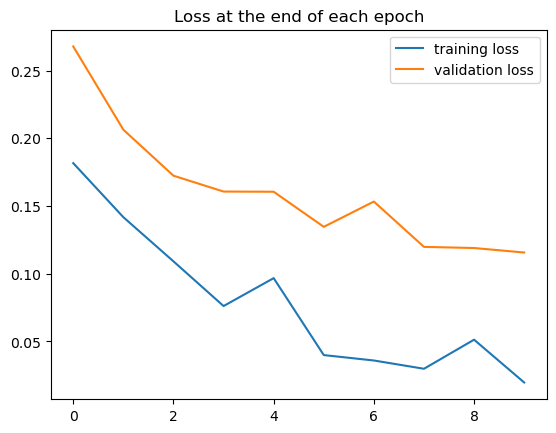

In [35]:
# Evaluation
plt.plot(train_losses, label='training loss')
plt.plot(test_losses, label='validation loss')
plt.title('Loss at the end of each epoch')
plt.legend();
#termasuk bagus karena validation lossnya LBH TINGGI (emg ini yg kita harapkan)
#masih agak sama kyk training. tp setelah epok 8 naik trs turun itu kurng konvergen
#konvergen = mendekati 0

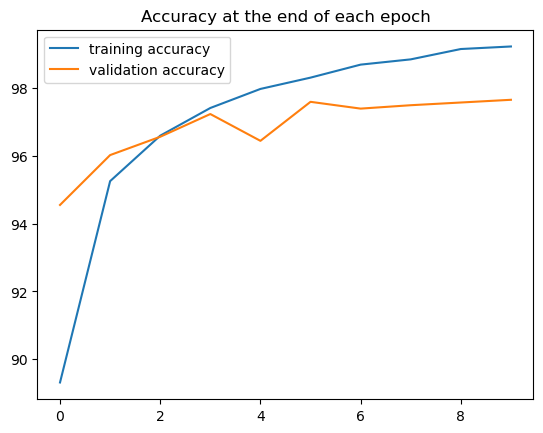

In [36]:
plt.plot([t/600 for t in train_correct], label='training accuracy') #600 because training data consist of 60,000/100 (batch size) =  600
plt.plot([t/100 for t in test_correct], label='validation accuracy') #100 because test data 10,000/100 = 100
plt.title('Accuracy at the end of each epoch')
plt.legend();


In [37]:
#Evaluate test data
# Extract the data all at once, not in batches
test_load_all = DataLoader(test_data, batch_size=10000, shuffle=False)

with torch.no_grad():
    correct = 0
    for X_test, y_test in test_load_all:
        y_val = model(X_test.view(len(X_test), -1))  # pass in a flattened view of X_test
        predicted = torch.max(y_val,1)[1]
        correct += (predicted == y_test).sum()
print(f'Test accuracy: {correct.item()}/{len(test_data)} = {correct.item()*100/(len(test_data)):7.3f}%')


Test accuracy: 9765/10000 =  97.650%


In [38]:
#Confusion Matrix
# print a row of values for reference
np.set_printoptions(formatter=dict(int=lambda x: f'{x:4}')) #x:4 => giving space each data
print(np.arange(10).reshape(1,10))
print()

# print the confusion matrix
print(confusion_matrix(predicted.view(-1), y_test.view(-1))) #The view(-1) operation flattens the tensor,

#yg paling tinggi akurasinya yg 1
# itu di kiri 0-9 ke bawah (sumbu y) = testtt view
#kalo yg sumber x itu prediksi
# itu angka2 kek 12 19 itu banyak salahnya

[[   0    1    2    3    4    5    6    7    8    9]]

[[ 971    0    1    1    0    1    1    1    3    5]
 [   0 1122    2    0    1    1    3    8    0    3]
 [   2    3 1017    6    6    0    2   12    2    0]
 [   1    3    3  993    0   19    1    5    3    9]
 [   0    0    1    0  950    1    2    0    0    7]
 [   0    0    0    1    0  850    1    1    2    8]
 [   3    1    2    1    9    9  947    0    3    1]
 [   0    0    3    3    2    0    0  990    2    0]
 [   3    6    2    3    2   10    1    6  956    7]
 [   0    0    1    2   12    1    0    5    3  969]]


In [ ]:
#TUGAS
#try to design another model of ANN to classofy MNIST
#ngubah di codingan 3.2 coba pake yg 2^n, di tengah menggembung
#pake GUI STREAMLIT WAKAKAKAKAKKA